##### Problem 1. Use the same data as earlier. Build the best MLR model you can. Why do you think yours is best? Make sure you support your choice with plots, written explanation, etc. Include at least three variables, at least one of which should be a dummy variable.

In [3]:
import pandas as pd

SHD = pd.read_csv('../3.03-linear-regression-part-i-lab/data/sacramento_data_clean.csv')

I'm going to create a dummy variable for HUGE houses. Those with square footage 3 standard deviations away from the mean, to be very specific.

- Mean = 1315
- STD = 853
- Huge Houses > 3775 sq ft




In [4]:
big = []
for home in SHD['sq__ft']: #run through the dataframe
    if home >= 3775:
        big.append('HUGE') #append "HUGE" for houses that are more than 3775 sq ft
    else:
        big.append('not huge') #if not append 'not huge'

SHD['Huge_homes'] = big

In [5]:
SHD['Huge_homes'] = pd.get_dummies(SHD['Huge_homes'], drop_first = True) #and then I want dummies for houses that are huge and aren't huge

In [6]:
SHD['Huge_homes'].value_counts() #let's check what our distribution of huge houses vs. not huge houses looks like
#this is a really well distributed variable...

1    975
0     10
Name: Huge_homes, dtype: int64

In [17]:
import statsmodels.api as sm

# Setting X and y for modelling
X = SHD[['sq__ft','beds','baths','Huge_homes']]
y = SHD['price']
X = sm.add_constant(X)


# fit our model
model = sm.OLS(y,X).fit()

#and generate predicted values using the model we just fit
y_pred = model.predict(X)

In [18]:
#let's print out what we just did
y_pred[:5]

0    185005.436269
1    184187.438852
2    184627.282752
3    185156.697675
4    184636.736590
dtype: float64

##### Problem 2. Plot the residuals comparing your MLR model to the true data points.

In [19]:
SHD['y_pred']=y_pred
SHD['Residuals'] = SHD['price'] - SHD['y_pred']

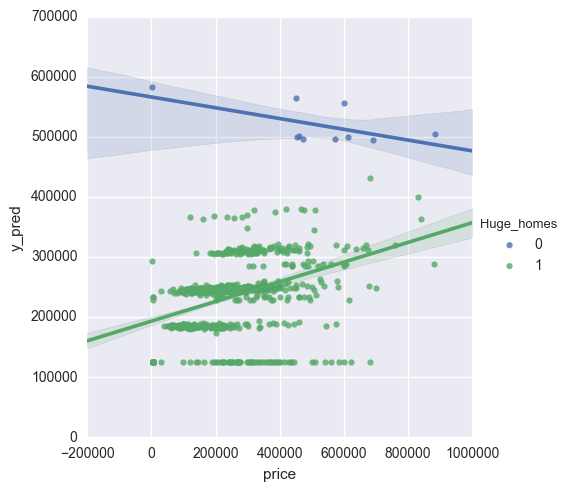

In [20]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x ='price', y = 'y_pred', data = SHD, hue = 'Huge_homes')

##### Problem 3. List the five assumptions for an MLR model. Indicate which ones are the same as the assumptions for an SLR model. 

##### - Linearity: Y must have an approximately linear relationship with each independent X_i.
##### - Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.
##### - Normality: The errors (residuals) follow a Normal distribution.
##### - Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.) </br> 


##### - Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j





##### Problem 4. Pick at least two assumptions and articulate whether or not you believe them to be met and why.

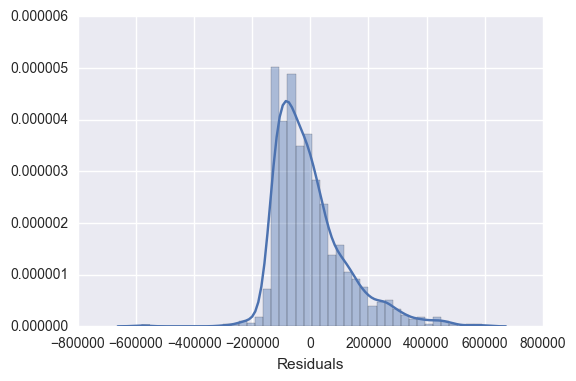

In [21]:
# Normality:  Do the Residual Errors follow a normal distribution.

sns.distplot(SHD['Residuals'])

The errors are more or less skewed to the right, but do tend towards normality.

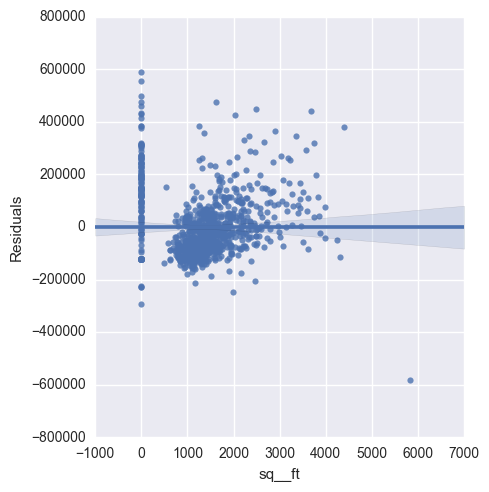

In [22]:
#Equality of variance.  I believe all the observations with 0 sq ft 
# are obscuring the predictive trend so as prices increase, error is going to as well.

sns.lmplot(x = 'sq__ft', y='Residuals', data = SHD)

Those zero square foot properties are causing serious havoc. But, there is _some_ trend, at least?

##### Problem 5. Interpret the y-intercept and at least two of the independent variables.

In [14]:
# going through this after problem 6

##### Problem 6. Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. Write a few sentences interpreting some of the output.

(Hint: scikit-learn does not have this functionality built in, but statsmodels does.)


statsmodel.Model.summary

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     59.05
Date:                Fri, 24 Mar 2017   Prob (F-statistic):           1.07e-44
Time:                        12:19:35   Log-Likelihood:                -12951.
No. Observations:                 985   AIC:                         2.591e+04
Df Residuals:                     980   BIC:                         2.594e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.999e+05   4.47e+04      6.709      0.000    2.12e+05    3.88e+05
sq__ft         9.4538      6.985      1.353      0.176      -4.254      23.161
beds       -3947.2178   5955.987     -0.663      0.508   -1.56e+04    7740.738
baths       5.979e+04   8400.448      7.117      0.000    4.33e+04    7.63e+04
Huge_homes -1.747e+05   4.29e+04     -4.075      0.000   -2.59e+05   -9.06e+04
==============================================================================
Omnibus:                      231.835   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.528
Skew:                           1.257   Prob(JB):                    4.69e-120
Kurtosis:                       5.658   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The only variables with p-values less than 0.05 are baths and huge homes, which implies they have a statistically significant impact on price.

##### BONUS. You work for a real estate agency. You are asked to prepare an executive summary for your very busy boss highlighting the most important findings from your MLR model. Convey these findings in no more than two paragraphs. Be sure to briefly address any potential shortcomings of your model.
